In [1]:
# Core data manipulation and numerical libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn components
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN

# Hyperparameter optimization
import optuna

# Surrogate model 
import xgboost as xgb

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [2]:
df = pd.read_csv('../data/typhoon_impact_with_extreme_weather.csv')
df.head()

,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Typhoon Name             1776 non-null   object 
 1   Year                     1776 non-null   int64  
 2   Region                   1776 non-null   int64  
 3   Province                 1776 non-null   object 
 4   City/Municipality        1776 non-null   object 
 5   Families                 1776 non-null   int64  
 6   Person                   1776 non-null   int64  
 7   Brgy                     1776 non-null   int64  
 8   Dead                     1776 non-null   int64  
 9   Injured/Ill              1776 non-null   int64  
 10  Missing                  1776 non-null   int64  
 11  Totally                  1776 non-null   int64  
 12  Partially                1776 non-null   int64  
 13  Total                    1776 non-null   int64  
 14  Quantity                

In [4]:
df.isnull().sum()

Typhoon Name               0
Year                       0
Region                     0
Province                   0
City/Municipality          0
Families                   0
Person                     0
Brgy                       0
Dead                       0
Injured/Ill                0
Missing                    0
Totally                    0
Partially                  0
Total                      0
Quantity                   0
Cost                       0
Nearest_Station            0
Station_Province           0
Distance_km                0
PAR_START                  0
PAR_END                    0
Duration_in_PAR_Hours      0
Max_Sustained_Wind_kph     0
Typhoon_Type               0
Max_24hr_Rainfall_mm       0
Total_Storm_Rainfall_mm    0
Min_Pressure_hPa           0
Weather_Station_Mapped     0
Weather_Records_Found      0
Weather_Days_Covered       0
dtype: int64

In [5]:
df.columns

Index(['Typhoon Name', 'Year', 'Region', 'Province', 'City/Municipality',
       'Families', 'Person', 'Brgy', 'Dead', 'Injured/Ill', 'Missing',
       'Totally', 'Partially', 'Total', 'Quantity', 'Cost', 'Nearest_Station',
       'Station_Province', 'Distance_km', 'PAR_START', 'PAR_END',
       'Duration_in_PAR_Hours', 'Max_Sustained_Wind_kph', 'Typhoon_Type',
       'Max_24hr_Rainfall_mm', 'Total_Storm_Rainfall_mm', 'Min_Pressure_hPa',
       'Weather_Station_Mapped', 'Weather_Records_Found',
       'Weather_Days_Covered'],
      dtype='object')

In [6]:
df.head()

,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6


In [7]:
df.drop(columns=['Quantity', 'PAR_START', 'PAR_END', 'Weather_Days_Covered', 'Total', 'Weather_Station_Mapped', 'Station_Province', 'Nearest_Station', 'Year', 'Typhoon Name', 'City/Municipality', 'Province', 'Distance_km'], inplace=True)
df.head()

,Region,Families,Person,Brgy,Dead,Injured/Ill,Missing,Totally,Partially,Cost,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Records_Found
0,2,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,STY,25.6,39.00,977.1,6
1,2,968,3028,5,0,0,0,0,0,494592.00,133.0,195,STY,20.3,32.71,1000.5,6
2,2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,STY,25.6,39.00,977.1,6
3,2,575,1792,4,0,0,0,0,0,291082.96,133.0,195,STY,25.6,39.00,977.1,6
4,2,575,1955,6,0,0,0,0,0,296521.75,133.0,195,STY,25.6,39.00,977.1,6


In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.columns

Index(['region', 'families', 'person', 'brgy', 'dead', 'injured/ill',
       'missing', 'totally', 'partially', 'cost', 'duration_in_par_hours',
       'max_sustained_wind_kph', 'typhoon_type', 'max_24hr_rainfall_mm',
       'total_storm_rainfall_mm', 'min_pressure_hpa', 'weather_records_found'],
      dtype='object')

In [10]:
df['typhoon_type'].unique()

array(['STY', 'TY', 'STS', 'TD', 'TS'], dtype=object)

## Data Transformation

In [11]:
# Convert 'region' column to object type
df['region'] = df['region'].astype('object')

# Perform one-hot encoding for 'region' and convert to int (0/1)
region_encoded = pd.get_dummies(df['region'], prefix='region').astype(int)

# Map 'typhoon_type' to the specified labels
typhoon_type_mapping = {'STY': 4, 'TY': 3, 'STS': 2, 'TD': 1, 'TS': 0}
df['typhoon_type'] = df['typhoon_type'].map(typhoon_type_mapping)

# Concatenate the one-hot encoded 'region' columns back to the dataframe
df = pd.concat([df, region_encoded], axis=1)

# Drop the original 'region' column as it's now encoded
df.drop(columns=['region'], inplace=True)

df.head()

,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
1,968,3028,5,0,0,0,0,0,494592.00,133.0,195,4,20.3,32.71,1000.5,6,1,0,0,0
2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
3,575,1792,4,0,0,0,0,0,291082.96,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
4,575,1955,6,0,0,0,0,0,296521.75,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0


## PCA Generalization Functions
Functions for performing Principal Component Analysis on the typhoon impact dataset.

In [12]:
def prepare_pca_features(input_dataframe: pd.DataFrame, categorical_columns: list = None) -> tuple:
    """
    Prepare features for PCA by separating numerical and categorical columns.
    
    Parameters:
    -----------
    input_dataframe : pd.DataFrame
        The input dataframe containing features
    categorical_columns : list, optional
        List of categorical column names. If None, auto-detects object dtype columns.
    
    Returns:
    --------
    tuple: (numerical_features_df, categorical_features_df, numerical_column_names)
    """
    if categorical_columns is None:
        categorical_columns = input_dataframe.select_dtypes(include=['object']).columns.tolist()
    
    numerical_column_names = [col for col in input_dataframe.columns if col not in categorical_columns]
    
    numerical_features_df = input_dataframe[numerical_column_names].copy()
    categorical_features_df = input_dataframe[categorical_columns].copy() if categorical_columns else pd.DataFrame()
    
    return numerical_features_df, categorical_features_df, numerical_column_names


def scale_numerical_features(numerical_features_df: pd.DataFrame) -> tuple:
    """
    Scale numerical features using StandardScaler.
    
    Parameters:
    -----------
    numerical_features_df : pd.DataFrame
        DataFrame containing only numerical features
    
    Returns:
    --------
    tuple: (scaled_features_array, fitted_scaler_object)
    """
    feature_scaler_object = StandardScaler()
    scaled_features_array = feature_scaler_object.fit_transform(numerical_features_df)
    
    return scaled_features_array, feature_scaler_object


def perform_pca_analysis(
    scaled_features_array: np.ndarray,
    n_components: int = None,
    variance_threshold: float = 0.95
) -> tuple:
    """
    Perform PCA analysis on scaled features.
    
    Parameters:
    -----------
    scaled_features_array : np.ndarray
        Scaled numerical features array
    n_components : int, optional
        Number of components to keep. If None, uses variance_threshold.
    variance_threshold : float, default=0.95
        Cumulative variance threshold to determine n_components if n_components is None.
    
    Returns:
    --------
    tuple: (pca_transformed_array, fitted_pca_object, explained_variance_ratios)
    """
    # First fit PCA to determine optimal components if not specified
    if n_components is None:
        preliminary_pca_object = PCA()
        preliminary_pca_object.fit(scaled_features_array)
        cumulative_variance_array = np.cumsum(preliminary_pca_object.explained_variance_ratio_)
        n_components = np.argmax(cumulative_variance_array >= variance_threshold) + 1
        del preliminary_pca_object  # Clean up to avoid memory leak
    
    # Perform final PCA with determined number of components
    final_pca_object = PCA(n_components=n_components)
    pca_transformed_array = final_pca_object.fit_transform(scaled_features_array)
    explained_variance_ratios = final_pca_object.explained_variance_ratio_
    
    return pca_transformed_array, final_pca_object, explained_variance_ratios


def create_pca_dataframe(
    pca_transformed_array: np.ndarray,
    n_components: int
) -> pd.DataFrame:
    """
    Create a DataFrame from PCA transformed array with proper column names.
    
    Parameters:
    -----------
    pca_transformed_array : np.ndarray
        Array of PCA transformed features
    n_components : int
        Number of PCA components
    
    Returns:
    --------
    pd.DataFrame: DataFrame with PCA components as columns
    """
    pca_column_names = [f'PC{i+1}' for i in range(n_components)]
    pca_features_df = pd.DataFrame(pca_transformed_array, columns=pca_column_names)
    
    return pca_features_df


def plot_pca_variance_explanation(
    fitted_pca_object: PCA,
    figure_title: str = 'PCA Variance Explanation'
) -> None:
    """
    Plot the explained variance ratio for each PCA component.
    
    Parameters:
    -----------
    fitted_pca_object : PCA
        Fitted PCA object
    figure_title : str
        Title for the plot
    """
    variance_ratios_array = fitted_pca_object.explained_variance_ratio_
    cumulative_variance_array = np.cumsum(variance_ratios_array)
    n_components_count = len(variance_ratios_array)
    
    pca_variance_fig, pca_variance_axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Individual variance plot
    pca_variance_axes[0].bar(range(1, n_components_count + 1), variance_ratios_array, alpha=0.7, color='steelblue')
    pca_variance_axes[0].set_xlabel('Principal Component')
    pca_variance_axes[0].set_ylabel('Explained Variance Ratio')
    pca_variance_axes[0].set_title('Individual Explained Variance')
    pca_variance_axes[0].set_xticks(range(1, n_components_count + 1))
    
    # Cumulative variance plot
    pca_variance_axes[1].plot(range(1, n_components_count + 1), cumulative_variance_array, 'bo-', linewidth=2, markersize=8)
    pca_variance_axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
    pca_variance_axes[1].set_xlabel('Number of Components')
    pca_variance_axes[1].set_ylabel('Cumulative Explained Variance')
    pca_variance_axes[1].set_title('Cumulative Explained Variance')
    pca_variance_axes[1].set_xticks(range(1, n_components_count + 1))
    pca_variance_axes[1].legend()
    pca_variance_axes[1].grid(True, alpha=0.3)
    
    pca_variance_fig.suptitle(figure_title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Clean up
    plt.close(pca_variance_fig)


def get_pca_feature_loadings(
    fitted_pca_object: PCA,
    feature_names_list: list
) -> pd.DataFrame:
    """
    Get the feature loadings (component weights) for each PCA component.
    
    Parameters:
    -----------
    fitted_pca_object : PCA
        Fitted PCA object
    feature_names_list : list
        List of original feature names
    
    Returns:
    --------
    pd.DataFrame: DataFrame with feature loadings for each component
    """
    n_components_count = fitted_pca_object.n_components_
    component_names_list = [f'PC{i+1}' for i in range(n_components_count)]
    
    feature_loadings_df = pd.DataFrame(
        fitted_pca_object.components_.T,
        columns=component_names_list,
        index=feature_names_list
    )
    
    return feature_loadings_df


def run_complete_pca_pipeline(
    input_dataframe: pd.DataFrame,
    n_components: int = None,
    variance_threshold: float = 0.95,
    categorical_columns: list = None,
    show_plots: bool = True,
    return_loadings: bool = True
) -> dict:
    """
    Run the complete PCA pipeline on the input dataframe.
    
    Parameters:
    -----------
    input_dataframe : pd.DataFrame
        Input dataframe with features
    n_components : int, optional
        Number of PCA components. If None, auto-determined by variance_threshold.
    variance_threshold : float, default=0.95
        Cumulative variance threshold for auto-determining n_components
    categorical_columns : list, optional
        List of categorical column names to exclude from PCA
    show_plots : bool, default=True
        Whether to display variance explanation plots
    return_loadings : bool, default=True
        Whether to include feature loadings in the result
    
    Returns:
    --------
    dict: Dictionary containing:
        - 'pca_dataframe': DataFrame with PCA components
        - 'pca_object': Fitted PCA object
        - 'scaler_object': Fitted StandardScaler object
        - 'explained_variance': Array of explained variance ratios
        - 'total_variance_explained': Total variance explained by components
        - 'feature_loadings': DataFrame of feature loadings (if return_loadings=True)
        - 'numerical_features': List of numerical feature names used
    """
    # Step 1: Prepare features
    numerical_features_df, categorical_features_df, numerical_column_names = prepare_pca_features(
        input_dataframe, categorical_columns
    )
    
    print(f"Numerical features for PCA: {len(numerical_column_names)}")
    print(f"Features: {numerical_column_names}")
    
    # Step 2: Scale features
    scaled_features_array, feature_scaler_object = scale_numerical_features(numerical_features_df)
    
    # Step 3: Perform PCA
    pca_transformed_array, fitted_pca_object, explained_variance_ratios = perform_pca_analysis(
        scaled_features_array, n_components, variance_threshold
    )
    
    actual_n_components = fitted_pca_object.n_components_
    total_variance_explained = np.sum(explained_variance_ratios)
    
    print(f"\nPCA Results:")
    print(f"Number of components: {actual_n_components}")
    print(f"Total variance explained: {total_variance_explained:.4f} ({total_variance_explained*100:.2f}%)")
    
    # Step 4: Create PCA DataFrame
    pca_features_df = create_pca_dataframe(pca_transformed_array, actual_n_components)
    
    # Step 5: Plot variance explanation
    if show_plots:
        plot_pca_variance_explanation(fitted_pca_object, 'Typhoon Impact Data - PCA Variance Explanation')
    
    # Prepare result dictionary
    pca_result_dict = {
        'pca_dataframe': pca_features_df,
        'pca_object': fitted_pca_object,
        'scaler_object': feature_scaler_object,
        'explained_variance': explained_variance_ratios,
        'total_variance_explained': total_variance_explained,
        'numerical_features': numerical_column_names
    }
    
    # Step 6: Get feature loadings if requested
    if return_loadings:
        feature_loadings_df = get_pca_feature_loadings(fitted_pca_object, numerical_column_names)
        pca_result_dict['feature_loadings'] = feature_loadings_df
    
    # Clean up intermediate variables
    del scaled_features_array, pca_transformed_array
    
    return pca_result_dict

Numerical features for PCA: 20
Features: ['families', 'person', 'brgy', 'dead', 'injured/ill', 'missing', 'totally', 'partially', 'cost', 'duration_in_par_hours', 'max_sustained_wind_kph', 'typhoon_type', 'max_24hr_rainfall_mm', 'total_storm_rainfall_mm', 'min_pressure_hpa', 'weather_records_found', 'region_2', 'region_3', 'region_5', 'region_8']

PCA Results:
Number of components: 13
Total variance explained: 0.9502 (95.02%)


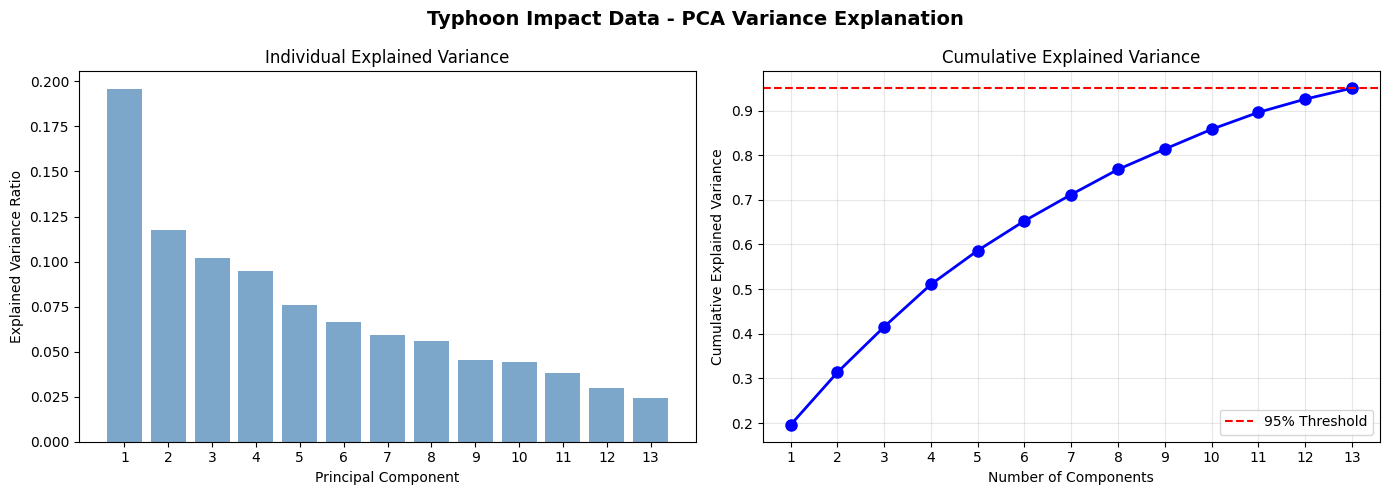

In [13]:
# Run PCA pipeline on typhoon impact data
typhoon_pca_results = run_complete_pca_pipeline(
    input_dataframe=df,
    n_components=None,  # Auto-determine based on variance threshold
    variance_threshold=0.95,
    categorical_columns=None,  # Include all columns (typhoon_type is now ordinal encoded)
    show_plots=True,
    return_loadings=True
)

In [14]:
# Access PCA results
typhoon_pca_df = typhoon_pca_results['pca_dataframe']

# Display explained variance information
print("=" * 60)
print("PCA EXPLAINED VARIANCE SUMMARY")
print("=" * 60)
print(f"Total samples: {len(typhoon_pca_df)}")
print(f"Number of PCA components: {typhoon_pca_df.shape[1]}")
print(f"Total variance explained: {typhoon_pca_results['total_variance_explained']*100:.2f}%")
print("\nVariance explained per component:")
for i, var in enumerate(typhoon_pca_results['explained_variance']):
    print(f"  PC{i+1}: {var*100:.2f}%")
print("=" * 60)

PCA EXPLAINED VARIANCE SUMMARY
Total samples: 1776
Number of PCA components: 13
Total variance explained: 95.02%

Variance explained per component:
  PC1: 19.58%
  PC2: 11.76%
  PC3: 10.22%
  PC4: 9.50%
  PC5: 7.59%
  PC6: 6.65%
  PC7: 5.90%
  PC8: 5.62%
  PC9: 4.56%
  PC10: 4.43%
  PC11: 3.79%
  PC12: 2.97%
  PC13: 2.45%


## Plotting 2D and 3D

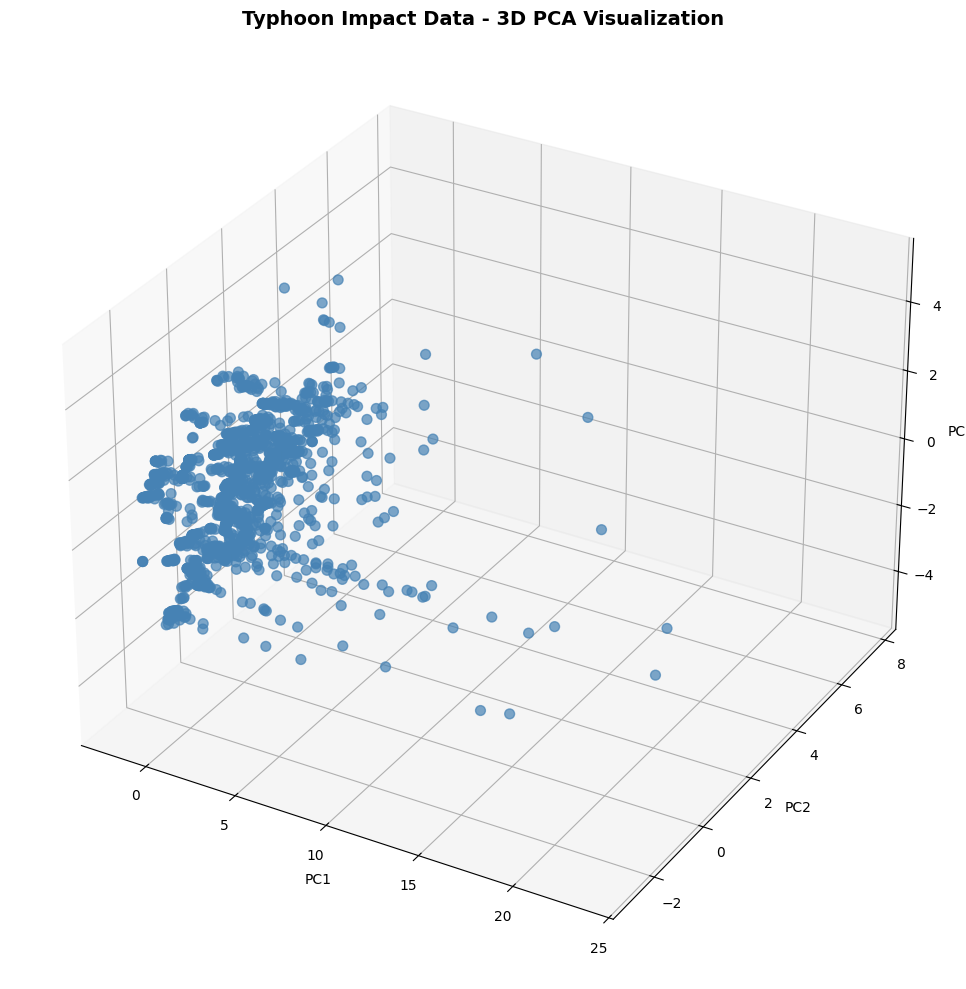

In [15]:
# 3D PCA Visualization
from mpl_toolkits.mplot3d import Axes3D

def plot_pca_3d(
    pca_dataframe: pd.DataFrame,
    cluster_labels: np.ndarray = None,
    figure_title: str = 'PCA 3D Visualization'
) -> None:
    """
    Create a 3D scatter plot of the first 3 PCA components.
    
    Parameters:
    -----------
    pca_dataframe : pd.DataFrame
        DataFrame containing PCA components (PC1, PC2, PC3)
    cluster_labels : np.ndarray, optional
        Cluster labels for coloring points
    figure_title : str
        Title for the 3D plot
    """
    pca_3d_fig = plt.figure(figsize=(12, 10))
    pca_3d_ax = pca_3d_fig.add_subplot(111, projection='3d')
    
    pc1_values = pca_dataframe['PC1'].values
    pc2_values = pca_dataframe['PC2'].values
    pc3_values = pca_dataframe['PC3'].values
    
    if cluster_labels is not None:
        scatter_plot = pca_3d_ax.scatter(
            pc1_values, pc2_values, pc3_values,
            c=cluster_labels, cmap='viridis', s=50, alpha=0.7
        )
        pca_3d_fig.colorbar(scatter_plot, ax=pca_3d_ax, label='Cluster')
    else:
        pca_3d_ax.scatter(
            pc1_values, pc2_values, pc3_values,
            c='steelblue', s=50, alpha=0.7
        )
    
    pca_3d_ax.set_xlabel('PC1')
    pca_3d_ax.set_ylabel('PC2')
    pca_3d_ax.set_zlabel('PC3')
    pca_3d_ax.set_title(figure_title, fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    plt.close(pca_3d_fig)

# Plot 3D PCA visualization
plot_pca_3d(typhoon_pca_df, figure_title='Typhoon Impact Data - 3D PCA Visualization')

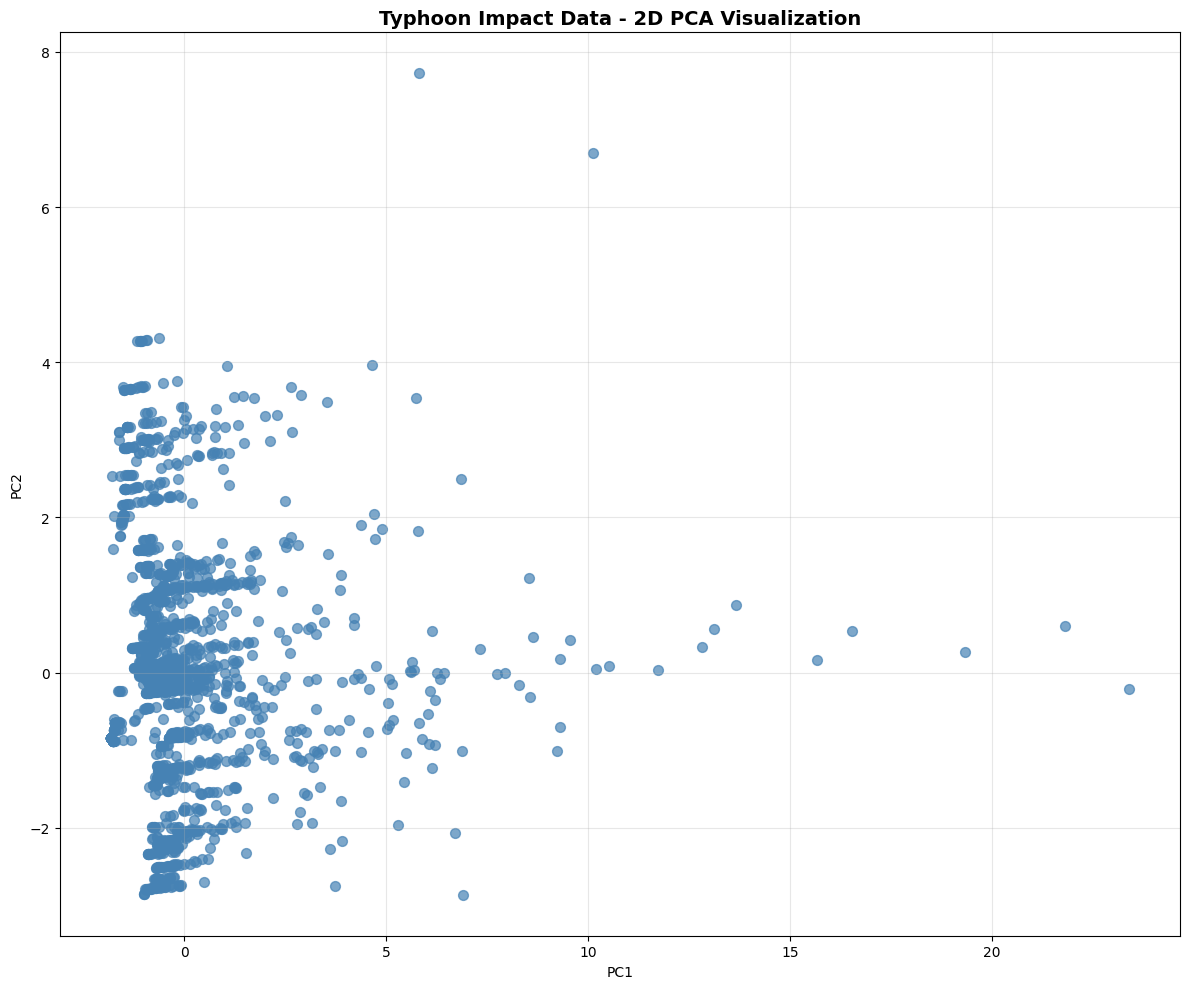

In [16]:
# 2D PCA Visualization
def plot_pca_2d(
    pca_dataframe: pd.DataFrame,
    cluster_labels: np.ndarray = None,
    figure_title: str = 'PCA 2D Visualization'
) -> None:
    """
    Create a 2D scatter plot of the first 2 PCA components.
    
    Parameters:
    -----------
    pca_dataframe : pd.DataFrame
        DataFrame containing PCA components (PC1, PC2)
    cluster_labels : np.ndarray, optional
        Cluster labels for coloring points
    figure_title : str
        Title for the 2D plot
    """
    pca_2d_fig, pca_2d_ax = plt.subplots(figsize=(12, 10))
    
    pc1_values = pca_dataframe['PC1'].values
    pc2_values = pca_dataframe['PC2'].values
    
    if cluster_labels is not None:
        scatter_plot_2d = pca_2d_ax.scatter(
            pc1_values, pc2_values,
            c=cluster_labels, cmap='viridis', s=50, alpha=0.7
        )
        pca_2d_fig.colorbar(scatter_plot_2d, ax=pca_2d_ax, label='Cluster')
    else:
        pca_2d_ax.scatter(
            pc1_values, pc2_values,
            c='steelblue', s=50, alpha=0.7
        )
    
    pca_2d_ax.set_xlabel('PC1')
    pca_2d_ax.set_ylabel('PC2')
    pca_2d_ax.set_title(figure_title, fontsize=14, fontweight='bold')
    pca_2d_ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    plt.close(pca_2d_fig)

# Plot 2D PCA visualization
plot_pca_2d(typhoon_pca_df, figure_title='Typhoon Impact Data - 2D PCA Visualization')

In [17]:
df.head()

,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
1,968,3028,5,0,0,0,0,0,494592.00,133.0,195,4,20.3,32.71,1000.5,6,1,0,0,0
2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
3,575,1792,4,0,0,0,0,0,291082.96,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
4,575,1955,6,0,0,0,0,0,296521.75,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0


## Standard Scaling of Sample Data

In [18]:
# Initialize StandardScaler
scaler = StandardScaler()

df_clean = df.copy()

# Fit and transform the data
df_scaled = scaler.fit_transform(df_clean)

# Convert back to DataFrame with original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

print("Original data (first 5 rows):")
display(df.head())
print("\nScaled data (first 5 rows):")
display(df_scaled.head())

Original data (first 5 rows):


,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
1,968,3028,5,0,0,0,0,0,494592.00,133.0,195,4,20.3,32.71,1000.5,6,1,0,0,0
2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
3,575,1792,4,0,0,0,0,0,291082.96,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
4,575,1955,6,0,0,0,0,0,296521.75,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0



Scaled data (first 5 rows):


,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,0.627959,0.432912,-0.245512,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,1.833588,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649
1,-0.096344,-0.147600,-0.332928,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,0.147222,0.422971,1.093216,1.133352,-1.173803,-1.226523,0.466233,0.309408,2.161972,-0.557406,-0.776459,-0.51649
2,-0.240108,-0.254921,-0.420344,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,-0.062254,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649
3,-0.204167,-0.236269,-0.420344,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,-0.012284,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649
4,-0.204167,-0.224576,-0.245512,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,-0.008021,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649


## KMeans Clustering with Optuna Optimization

In [19]:
# Load original dataset for later readability
df_original = pd.read_csv('../data/typhoon_impact_with_extreme_weather.csv')
df_original.head()

,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6


In [20]:
def optuna_kmeans_objective(trial, data, n_clusters=3):
    """
    Optuna objective function for KMeans hyperparameter optimization.
    
    Parameters:
    -----------
    trial : optuna.Trial
        Optuna trial object
    data : np.ndarray
        Scaled data for clustering
    n_clusters : int
        Number of clusters (fixed at 3)
    
    Returns:
    --------
    float: Silhouette score (to maximize)
    """
    # Hyperparameters to optimize
    init_method = trial.suggest_categorical('init', ['k-means++', 'random'])
    n_init = trial.suggest_int('n_init', 10, 50)
    max_iter = trial.suggest_int('max_iter', 100, 500)
    tol = trial.suggest_float('tol', 1e-6, 1e-2, log=True)
    algorithm = trial.suggest_categorical('algorithm', ['lloyd', 'elkan'])
    
    # Create and fit KMeans model
    kmeans_model = KMeans(
        n_clusters=n_clusters,
        init=init_method,
        n_init=n_init,
        max_iter=max_iter,
        tol=tol,
        algorithm=algorithm,
        random_state=42
    )
    
    cluster_labels = kmeans_model.fit_predict(data)
    
    # Calculate silhouette score
    silhouette = silhouette_score(data, cluster_labels)
    
    return silhouette

In [21]:
# Run Optuna optimization for KMeans
print("Starting Optuna optimization for KMeans clustering...")
print("=" * 60)

# Create Optuna study (maximize silhouette score)
optuna.logging.set_verbosity(optuna.logging.WARNING)
kmeans_study = optuna.create_study(direction='maximize', study_name='kmeans_optimization')

# Optimize using scaled data
kmeans_study.optimize(
    lambda trial: optuna_kmeans_objective(trial, df_scaled.values, n_clusters=3),
    n_trials=50,
    show_progress_bar=True
)

# Display best parameters
print("\n" + "=" * 60)
print("OPTUNA OPTIMIZATION RESULTS")
print("=" * 60)
print(f"Best Silhouette Score: {kmeans_study.best_value:.4f}")
print("\nBest Hyperparameters:")
for param, value in kmeans_study.best_params.items():
    print(f"  {param}: {value}")
print("=" * 60)

Starting Optuna optimization for KMeans clustering...


  0%|          | 0/50 [00:00<?, ?it/s]


OPTUNA OPTIMIZATION RESULTS
Best Silhouette Score: 0.1479

Best Hyperparameters:
  init: k-means++
  n_init: 29
  max_iter: 237
  tol: 0.0007910515493964145
  algorithm: elkan


In [22]:
# Train final KMeans model with best parameters
best_params = kmeans_study.best_params

final_kmeans_model = KMeans(
    n_clusters=3,
    init=best_params['init'],
    n_init=best_params['n_init'],
    max_iter=best_params['max_iter'],
    tol=best_params['tol'],
    algorithm=best_params['algorithm'],
    random_state=42
)

# Fit and predict cluster labels
cluster_labels = final_kmeans_model.fit_predict(df_scaled.values)

# Add cluster labels to dataframes
df_scaled['cluster'] = cluster_labels
df_original['cluster'] = cluster_labels

print("Final KMeans Model Summary:")
print("=" * 60)
print(f"Number of clusters: 3")
print(f"Inertia: {final_kmeans_model.inertia_:.4f}")
print(f"\nCluster distribution:")
print(df_original['cluster'].value_counts().sort_index())
print("=" * 60)

Final KMeans Model Summary:
Number of clusters: 3
Inertia: 28321.1836

Cluster distribution:
cluster
0      74
1     658
2    1044
Name: count, dtype: int64


In [23]:
# Calculate clustering evaluation metrics
silhouette = silhouette_score(df_scaled.drop(columns=['cluster']).values, cluster_labels)
calinski = calinski_harabasz_score(df_scaled.drop(columns=['cluster']).values, cluster_labels)
davies = davies_bouldin_score(df_scaled.drop(columns=['cluster']).values, cluster_labels)

print("Clustering Evaluation Metrics:")
print("=" * 60)
print(f"Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
print(f"Calinski-Harabasz Index: {calinski:.4f} (higher is better)")
print(f"Davies-Bouldin Index: {davies:.4f} (lower is better)")
print("=" * 60)

Clustering Evaluation Metrics:
Silhouette Score: 0.1479 (higher is better, range: -1 to 1)
Calinski-Harabasz Index: 225.3349 (higher is better)
Davies-Bouldin Index: 2.0925 (lower is better)


## 2D and 3D Cluster Visualization

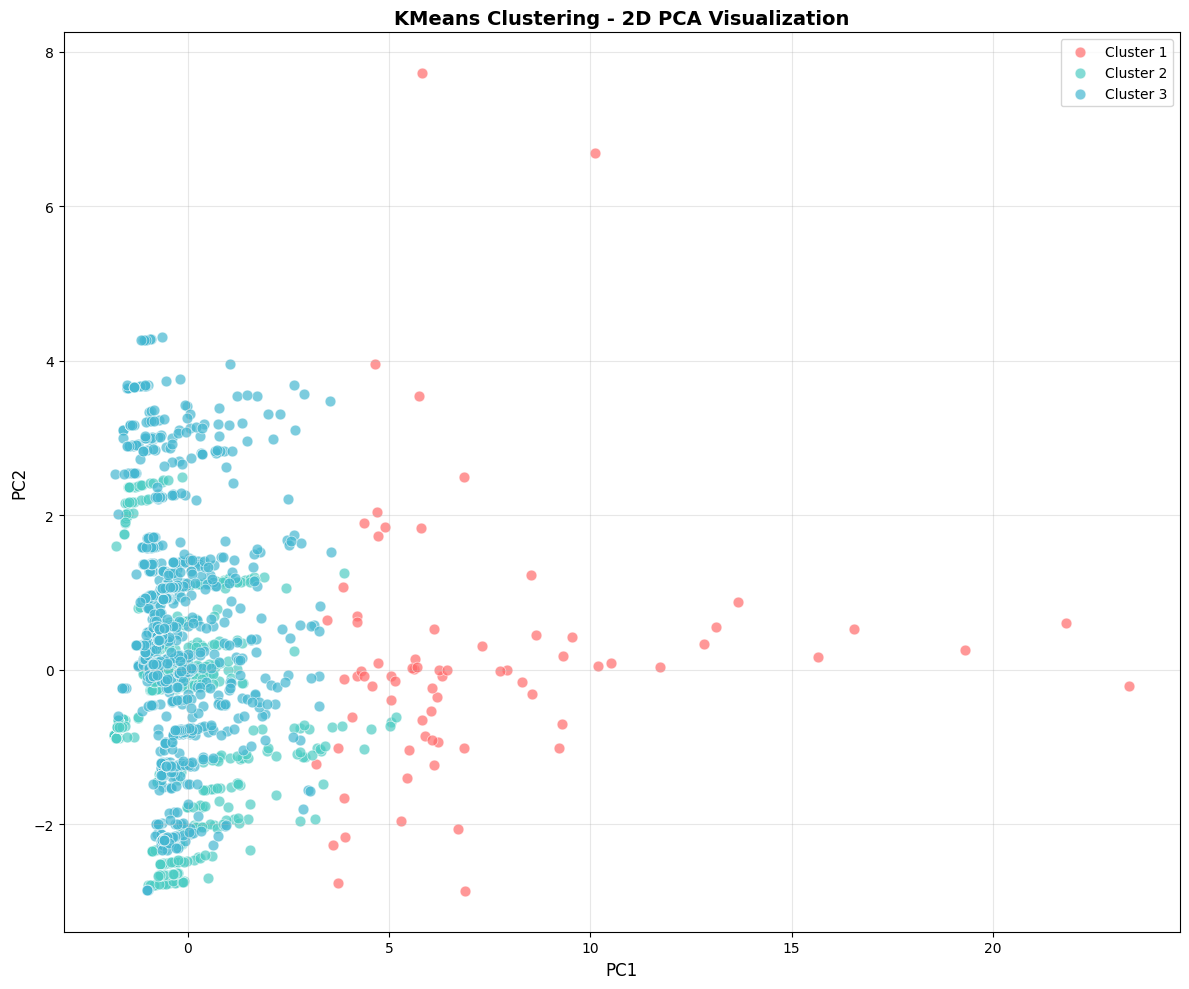

In [24]:
# Add cluster labels to PCA dataframe
typhoon_pca_df['cluster'] = cluster_labels

# 2D PCA Visualization with Clusters
def plot_kmeans_2d(pca_dataframe, cluster_labels, centroids_pca=None):
    """
    Create a 2D scatter plot with KMeans clusters.
    """
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Define colors for clusters
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']
    
    for cluster_id in range(3):
        mask = pca_dataframe['cluster'] == cluster_id
        ax.scatter(
            pca_dataframe.loc[mask, 'PC1'],
            pca_dataframe.loc[mask, 'PC2'],
            c=colors[cluster_id],
            label=cluster_names[cluster_id],
            s=60,
            alpha=0.7,
            edgecolors='white',
            linewidth=0.5
        )
    
    ax.set_xlabel('PC1', fontsize=12)
    ax.set_ylabel('PC2', fontsize=12)
    ax.set_title('KMeans Clustering - 2D PCA Visualization', fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# Plot 2D clusters
plot_kmeans_2d(typhoon_pca_df, cluster_labels)

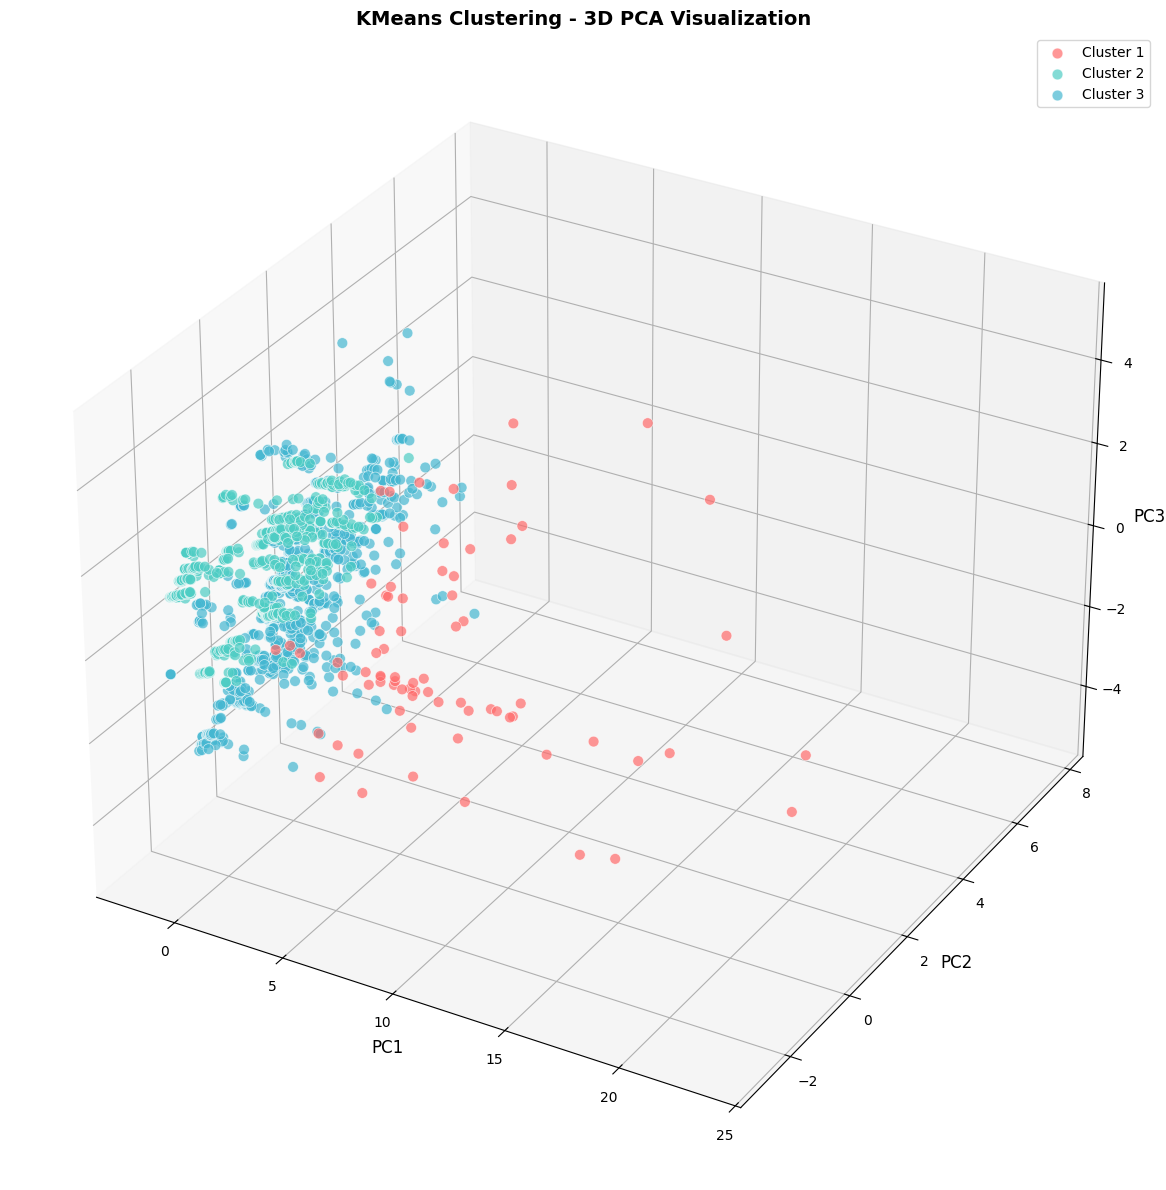

In [25]:
# 3D PCA Visualization with Clusters
def plot_kmeans_3d(pca_dataframe, cluster_labels):
    """
    Create a 3D scatter plot with KMeans clusters.
    """
    fig = plt.figure(figsize=(14, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define colors for clusters
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']
    
    for cluster_id in range(3):
        mask = pca_dataframe['cluster'] == cluster_id
        ax.scatter(
            pca_dataframe.loc[mask, 'PC1'],
            pca_dataframe.loc[mask, 'PC2'],
            pca_dataframe.loc[mask, 'PC3'],
            c=colors[cluster_id],
            label=cluster_names[cluster_id],
            s=60,
            alpha=0.7,
            edgecolors='white',
            linewidth=0.5
        )
    
    ax.set_xlabel('PC1', fontsize=12)
    ax.set_ylabel('PC2', fontsize=12)
    ax.set_zlabel('PC3', fontsize=12)
    ax.set_title('KMeans Clustering - 3D PCA Visualization', fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# Plot 3D clusters
plot_kmeans_3d(typhoon_pca_df, cluster_labels)

## Cluster Examples from Original Dataset

In [26]:
# Display examples from each cluster using original dataset for readability
print("=" * 80)
print("CLUSTER EXAMPLES FROM ORIGINAL DATASET")
print("=" * 80)

for cluster_id in range(3):
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id + 1} (Label: {cluster_id})")
    print(f"Total samples in cluster: {len(df_original[df_original['cluster'] == cluster_id])}")
    print(f"{'='*80}")
    
    # Get 5 random examples from each cluster
    cluster_examples = df_original[df_original['cluster'] == cluster_id].sample(
        n=min(5, len(df_original[df_original['cluster'] == cluster_id])),
        random_state=42
    )
    
    display(cluster_examples)
    print()

CLUSTER EXAMPLES FROM ORIGINAL DATASET

CLUSTER 1 (Label: 0)
Total samples in cluster: 74


,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered,cluster
151,PAENG,2022,2,CAGAYAN,TUGUEGARAO CITY,11592,39537,41,0,0,...,124.7,110,STS,39.0,56.81,998.6,1,6,6,0
1745,ODETTE,2021,8,SOUTHERN LEYTE,MAASIN,25442,121994,70,1,0,...,91.0,195,STY,24.2,25.00,975.2,1,5,5,0
826,ROLLY,2020,5,ALBAY,BACACAY,5968,22580,47,0,0,...,122.0,225,STY,166.7,287.90,981.0,1,6,6,0
10,KIKO,2021,2,BATANES,BASCO,3043,10656,6,0,0,...,116.0,215,STY,420.7,604.90,927.9,1,6,6,0
1438,AGATON,2022,8,EASTERN SAMAR,GUIUAN,11810,47747,60,0,0,...,78.0,75,TS,207.8,259.90,995.4,1,4,4,0




CLUSTER 2 (Label: 1)
Total samples in cluster: 658


,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered,cluster
1335,AMBO,2020,5,SORSOGON,MATNOG,705,2107,20,0,0,...,198.0,155,TY,260.8,278.8,1000.0,1,8,8,1
1050,PAENG,2022,5,CAMARINES SUR,LUPI,980,3562,37,0,0,...,124.7,110,STS,105.6,267.0,989.5,1,6,6,1
1031,OFEL,2020,5,CAMARINES SUR,SIRUMA,2,10,1,0,0,...,61.0,45,TD,97.4,193.4,1003.5,1,4,4,1
797,PAENG,2022,5,ALBAY,LIGAO CITY,827,3040,36,0,0,...,124.7,110,STS,108.8,202.6,988.7,1,6,6,1
1090,QUINTA,2020,5,CAMARINES SUR,NAGA CITY,831,3212,15,0,0,...,71.0,150,TY,41.4,89.0,989.0,1,5,5,1




CLUSTER 3 (Label: 2)
Total samples in cluster: 1044


,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered,cluster
1686,JOLINA,2021,8,SAMAR,HINABANGAN,0,0,0,0,1,...,103.0,120,TY,99.5,101.50,1002.9,1,4,4,2
285,ROLLY,2020,2,NUEVA VIZCAYA,BAMBANG,6,34,4,0,0,...,122.0,225,STY,52.6,72.11,1003.9,1,6,6,2
553,ROLLY,2020,3,NUEVA ECIJA,BONGABON,4,20,3,0,0,...,122.0,225,STY,13.4,20.80,1003.5,1,6,6,2
1519,AGATON,2022,8,LEYTE,ALBUERA,203,1008,0,0,0,...,78.0,75,TS,106.0,268.60,998.8,1,4,4,2
662,PAENG,2022,3,TARLAC,CAPAS,100,383,2,0,0,...,124.7,110,STS,109.2,230.70,990.5,1,6,6,2


## MAACLI Framework: Multi-Attribute Analysis for Cluster-Level Insights

The MAACLI framework provides a structured approach to understanding and interpreting clustering results through:
1. **Cluster Profiling** - Statistical summaries of each cluster
2. **Feature Importance Analysis** - Identifying key differentiating attributes
3. **Decision Tree Rules** - Extracting interpretable rules for cluster assignment
4. **Cluster Descriptions** - Human-readable explanations of each cluster

In [27]:
# MAACLI Framework Implementation
from sklearn.tree import DecisionTreeClassifier, export_text
import xgboost as xgb

class MAACLIFramework:
    """
    Multi-Attribute Analysis for Cluster-Level Insights (MAACLI) Framework.
    Provides interpretable insights from clustering results.
    """
    
    def __init__(self, original_data: pd.DataFrame, cluster_labels: np.ndarray, feature_columns: list):
        """
        Initialize MAACLI Framework.
        
        Parameters:
        -----------
        original_data : pd.DataFrame
            Original dataset with readable values
        cluster_labels : np.ndarray
            Cluster assignments for each sample
        feature_columns : list
            List of feature column names used for clustering
        """
        self.original_data = original_data.copy()
        self.cluster_labels = cluster_labels
        self.feature_columns = feature_columns
        self.n_clusters = len(np.unique(cluster_labels))
        self.original_data['cluster'] = cluster_labels
        self.cluster_profiles = None
        self.decision_tree = None
        self.feature_importance = None
    
    def generate_cluster_profiles(self) -> pd.DataFrame:
        """
        Generate statistical profiles for each cluster.
        
        Returns:
        --------
        pd.DataFrame: Cluster profiles with mean, std, min, max for each feature
        """
        numeric_cols = self.original_data.select_dtypes(include=[np.number]).columns.tolist()
        numeric_cols = [col for col in numeric_cols if col != 'cluster']
        
        profiles = []
        for cluster_id in range(self.n_clusters):
            cluster_data = self.original_data[self.original_data['cluster'] == cluster_id]
            profile = {
                'cluster': cluster_id,
                'count': len(cluster_data),
                'percentage': len(cluster_data) / len(self.original_data) * 100
            }
            
            for col in numeric_cols:
                profile[f'{col}_mean'] = cluster_data[col].mean()
                profile[f'{col}_std'] = cluster_data[col].std()
                profile[f'{col}_median'] = cluster_data[col].median()
                profile[f'{col}_q25'] = cluster_data[col].quantile(0.25)
                profile[f'{col}_q75'] = cluster_data[col].quantile(0.75)
            
            profiles.append(profile)
        
        self.cluster_profiles = pd.DataFrame(profiles)
        return self.cluster_profiles
    
    def train_surrogate_decision_tree(self, max_depth: int = 4) -> str:
        """
        Train a decision tree as a surrogate model to explain cluster assignments.
        
        Parameters:
        -----------
        max_depth : int
            Maximum depth of the decision tree
        
        Returns:
        --------
        str: Text representation of decision tree rules
        """
        numeric_cols = self.original_data.select_dtypes(include=[np.number]).columns.tolist()
        numeric_cols = [col for col in numeric_cols if col != 'cluster']
        
        X = self.original_data[numeric_cols].values
        y = self.cluster_labels
        
        self.decision_tree = DecisionTreeClassifier(
            max_depth=max_depth,
            random_state=42,
            min_samples_leaf=10
        )
        self.decision_tree.fit(X, y)
        
        # Get feature importance
        self.feature_importance = pd.DataFrame({
            'feature': numeric_cols,
            'importance': self.decision_tree.feature_importances_
        }).sort_values('importance', ascending=False)
        
        # Export tree rules
        tree_rules = export_text(self.decision_tree, feature_names=numeric_cols)
        
        return tree_rules
    
    def get_cluster_descriptions(self) -> dict:
        """
        Generate human-readable descriptions for each cluster based on key features.
        
        Returns:
        --------
        dict: Dictionary with cluster descriptions
        """
        if self.cluster_profiles is None:
            self.generate_cluster_profiles()
        
        descriptions = {}
        
        # Key impact features to analyze
        impact_features = ['Families', 'Person', 'Dead', 'Injured/Ill', 'Missing', 
                          'Totally', 'Partially', 'Cost', 'Max_Sustained_Wind_kph',
                          'Max_24hr_Rainfall_mm', 'Duration_in_PAR_Hours']
        
        # Filter to available features
        available_features = [f for f in impact_features if f in self.original_data.columns]
        
        for cluster_id in range(self.n_clusters):
            cluster_data = self.original_data[self.original_data['cluster'] == cluster_id]
            
            desc = {
                'cluster_id': cluster_id,
                'sample_count': len(cluster_data),
                'percentage': f"{len(cluster_data) / len(self.original_data) * 100:.1f}%",
                'characteristics': {}
            }
            
            for feature in available_features:
                if feature in cluster_data.columns:
                    desc['characteristics'][feature] = {
                        'mean': cluster_data[feature].mean(),
                        'median': cluster_data[feature].median(),
                        'q25': cluster_data[feature].quantile(0.25),
                        'q75': cluster_data[feature].quantile(0.75)
                    }
            
            descriptions[cluster_id] = desc
        
        return descriptions
    
    def classify_cluster_severity(self) -> dict:
        """
        Classify clusters based on typhoon impact severity.
        
        Returns:
        --------
        dict: Cluster severity classifications
        """
        severity_scores = {}
        
        for cluster_id in range(self.n_clusters):
            cluster_data = self.original_data[self.original_data['cluster'] == cluster_id]
            
            # Calculate severity score based on key metrics
            score = 0
            
            # Casualty metrics (highest weight)
            if 'Dead' in cluster_data.columns:
                score += cluster_data['Dead'].mean() * 10
            if 'Missing' in cluster_data.columns:
                score += cluster_data['Missing'].mean() * 5
            if 'Injured/Ill' in cluster_data.columns:
                score += cluster_data['Injured/Ill'].mean() * 3
            
            # Damage metrics
            if 'Totally' in cluster_data.columns:
                score += cluster_data['Totally'].mean() * 2
            if 'Partially' in cluster_data.columns:
                score += cluster_data['Partially'].mean() * 1
            
            # Affected population
            if 'Families' in cluster_data.columns:
                score += cluster_data['Families'].mean() * 0.01
            
            severity_scores[cluster_id] = score
        
        # Rank clusters by severity
        sorted_clusters = sorted(severity_scores.items(), key=lambda x: x[1], reverse=True)
        
        severity_labels = ['High-Impact', 'Moderate-Impact', 'Low-Impact']
        classifications = {}
        
        for i, (cluster_id, score) in enumerate(sorted_clusters):
            label = severity_labels[min(i, len(severity_labels)-1)]
            classifications[cluster_id] = {
                'label': label,
                'severity_score': score,
                'rank': i + 1
            }
        
        return classifications

In [28]:
# Initialize MAACLI Framework
print("=" * 80)
print("MAACLI FRAMEWORK: Multi-Attribute Analysis for Cluster-Level Insights")
print("=" * 80)

# Get feature columns used for clustering
feature_columns = df.columns.tolist()

# Initialize framework with original data
maacli = MAACLIFramework(
    original_data=df_original.drop(columns=['cluster']),
    cluster_labels=cluster_labels,
    feature_columns=feature_columns
)

print("\nMAACLI Framework initialized successfully!")
print(f"Number of clusters: {maacli.n_clusters}")
print(f"Total samples: {len(maacli.original_data)}")

MAACLI FRAMEWORK: Multi-Attribute Analysis for Cluster-Level Insights

MAACLI Framework initialized successfully!
Number of clusters: 3
Total samples: 1776


### 1. Cluster Severity Classification

In [29]:
# Classify cluster severity
severity_classifications = maacli.classify_cluster_severity()

print("=" * 80)
print("CLUSTER SEVERITY CLASSIFICATIONS")
print("=" * 80)

for cluster_id, classification in severity_classifications.items():
    cluster_count = len(df_original[df_original['cluster'] == cluster_id])
    print(f"\nCluster {cluster_id}: {classification['label']} Typhoons")
    print(f"  - Severity Score: {classification['severity_score']:.2f}")
    print(f"  - Rank: {classification['rank']} of {maacli.n_clusters}")
    print(f"  - Sample Count: {cluster_count} ({cluster_count/len(df_original)*100:.1f}%)")

CLUSTER SEVERITY CLASSIFICATIONS

Cluster 0: High-Impact Typhoons
  - Severity Score: 5518.57
  - Rank: 1 of 3
  - Sample Count: 74 (4.2%)

Cluster 1: Moderate-Impact Typhoons
  - Severity Score: 190.68
  - Rank: 2 of 3
  - Sample Count: 658 (37.0%)

Cluster 2: Low-Impact Typhoons
  - Severity Score: 53.11
  - Rank: 3 of 3
  - Sample Count: 1044 (58.8%)


### 2. Decision Tree Surrogate Model Rules

In [30]:
# Generate decision tree rules for cluster interpretation
print("=" * 80)
print("DECISION TREE RULES FOR CLUSTER ASSIGNMENT")
print("=" * 80)

tree_rules = maacli.train_surrogate_decision_tree(max_depth=4)
print("\nDecision Tree Rules:")
print(tree_rules)

# Display decision tree accuracy
numeric_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'cluster']
X_tree = df_original[numeric_cols].values
tree_accuracy = maacli.decision_tree.score(X_tree, cluster_labels)
print(f"\nSurrogate Model Accuracy: {tree_accuracy:.4f} ({tree_accuracy*100:.2f}%)")

DECISION TREE RULES FOR CLUSTER ASSIGNMENT

Decision Tree Rules:
|--- Region <= 4.00
|   |--- Person <= 68648.00
|   |   |--- Cost <= 3344250.00
|   |   |   |--- Person <= 49126.00
|   |   |   |   |--- class: 2
|   |   |   |--- Person >  49126.00
|   |   |   |   |--- class: 2
|   |   |--- Cost >  3344250.00
|   |   |   |--- class: 0
|   |--- Person >  68648.00
|   |   |--- class: 0
|--- Region >  4.00
|   |--- Region <= 6.50
|   |   |--- Total <= 3496.00
|   |   |   |--- Brgy <= 43.00
|   |   |   |   |--- class: 1
|   |   |   |--- Brgy >  43.00
|   |   |   |   |--- class: 1
|   |   |--- Total >  3496.00
|   |   |   |--- class: 0
|   |--- Region >  6.50
|   |   |--- Cost <= 1274112.50
|   |   |   |--- Partially <= 1564.50
|   |   |   |   |--- class: 2
|   |   |   |--- Partially >  1564.50
|   |   |   |   |--- class: 2
|   |   |--- Cost >  1274112.50
|   |   |   |--- Total <= 2348.50
|   |   |   |   |--- class: 0
|   |   |   |--- Total >  2348.50
|   |   |   |   |--- class: 0


Surrogate

### 3. Feature Importance Analysis

FEATURE IMPORTANCE FOR CLUSTER DIFFERENTIATION

Top 15 Most Important Features:
  Region: 0.8766
  Cost: 0.0746
  Total: 0.0230
  Person: 0.0220
  Partially: 0.0035
  Brgy: 0.0002
  Year: 0.0000
  Duration_in_PAR_Hours: 0.0000
  Weather_Records_Found: 0.0000
  Weather_Station_Mapped: 0.0000
  Min_Pressure_hPa: 0.0000
  Total_Storm_Rainfall_mm: 0.0000
  Max_24hr_Rainfall_mm: 0.0000
  Max_Sustained_Wind_kph: 0.0000
  Quantity: 0.0000


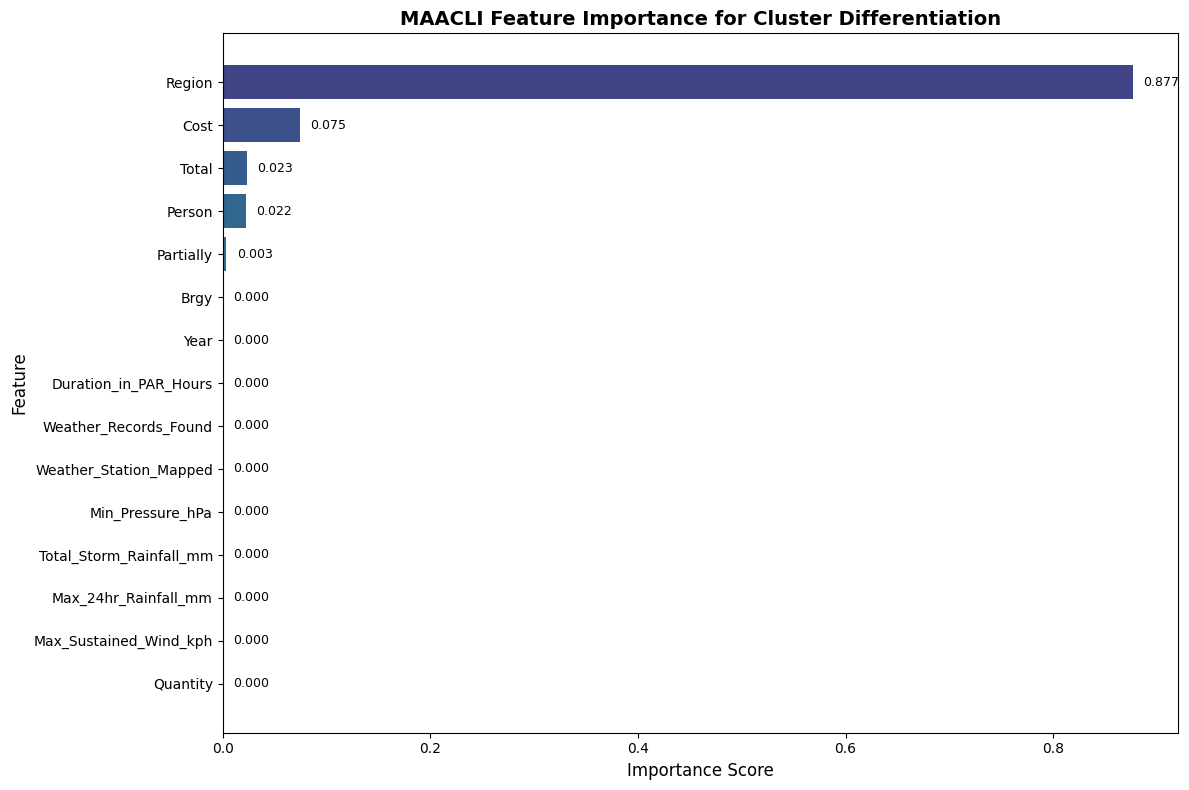

In [31]:
# Display feature importance from decision tree
print("=" * 80)
print("FEATURE IMPORTANCE FOR CLUSTER DIFFERENTIATION")
print("=" * 80)

# Get top 15 most important features
top_features = maacli.feature_importance.head(15)
print("\nTop 15 Most Important Features:")
for idx, row in top_features.iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

# Plot feature importance
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_features)))

bars = ax.barh(top_features['feature'], top_features['importance'], color=colors)
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
ax.set_title('MAACLI Feature Importance for Cluster Differentiation', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for bar, importance in zip(bars, top_features['importance']):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
            f'{importance:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()
plt.close(fig)

### 4. Detailed Cluster Profiles

In [32]:
# Generate detailed cluster descriptions
cluster_descriptions = maacli.get_cluster_descriptions()

print("=" * 80)
print("DETAILED CLUSTER PROFILES (MAACLI INSIGHTS)")
print("=" * 80)

# Define cluster names based on severity
cluster_names = {}
for cluster_id, classification in severity_classifications.items():
    cluster_names[cluster_id] = f"{classification['label']} Typhoons"

for cluster_id, desc in cluster_descriptions.items():
    severity = severity_classifications[cluster_id]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id}: {cluster_names[cluster_id]}")
    print(f"{'='*80}")
    print(f"Sample Count: {desc['sample_count']} ({desc['percentage']})")
    print(f"Severity Score: {severity['severity_score']:.2f}")
    print("\nKey Characteristics (75th Percentile Ranges):")
    
    for feature, stats in desc['characteristics'].items():
        print(f"  - {feature}: Q25={stats['q25']:.2f}, Median={stats['median']:.2f}, Q75={stats['q75']:.2f}")

DETAILED CLUSTER PROFILES (MAACLI INSIGHTS)

CLUSTER 0: High-Impact Typhoons
Sample Count: 74 (4.2%)
Severity Score: 5518.57

Key Characteristics (75th Percentile Ranges):
  - Families: Q25=5006.75, Median=9035.00, Q75=16028.50
  - Person: Q25=18547.25, Median=37289.00, Q75=64243.50
  - Dead: Q25=0.00, Median=0.00, Q75=0.00
  - Injured/Ill: Q25=0.00, Median=0.00, Q75=3.25
  - Missing: Q25=0.00, Median=0.00, Q75=0.00
  - Totally: Q25=0.00, Median=504.00, Q75=1292.50
  - Partially: Q25=0.25, Median=2388.00, Q75=4741.75
  - Cost: Q25=1778975.00, Median=4105881.96, Q75=5803680.48
  - Max_Sustained_Wind_kph: Q25=155.00, Median=195.00, Q75=195.00
  - Max_24hr_Rainfall_mm: Q25=24.20, Median=47.40, Q75=149.25
  - Duration_in_PAR_Hours: Q25=91.00, Median=114.00, Q75=122.00

CLUSTER 1: Moderate-Impact Typhoons
Sample Count: 658 (37.0%)
Severity Score: 190.68

Key Characteristics (75th Percentile Ranges):
  - Families: Q25=16.00, Median=235.00, Q75=841.50
  - Person: Q25=57.25, Median=926.50, Q75

### 5. Cluster Comparison Heatmap

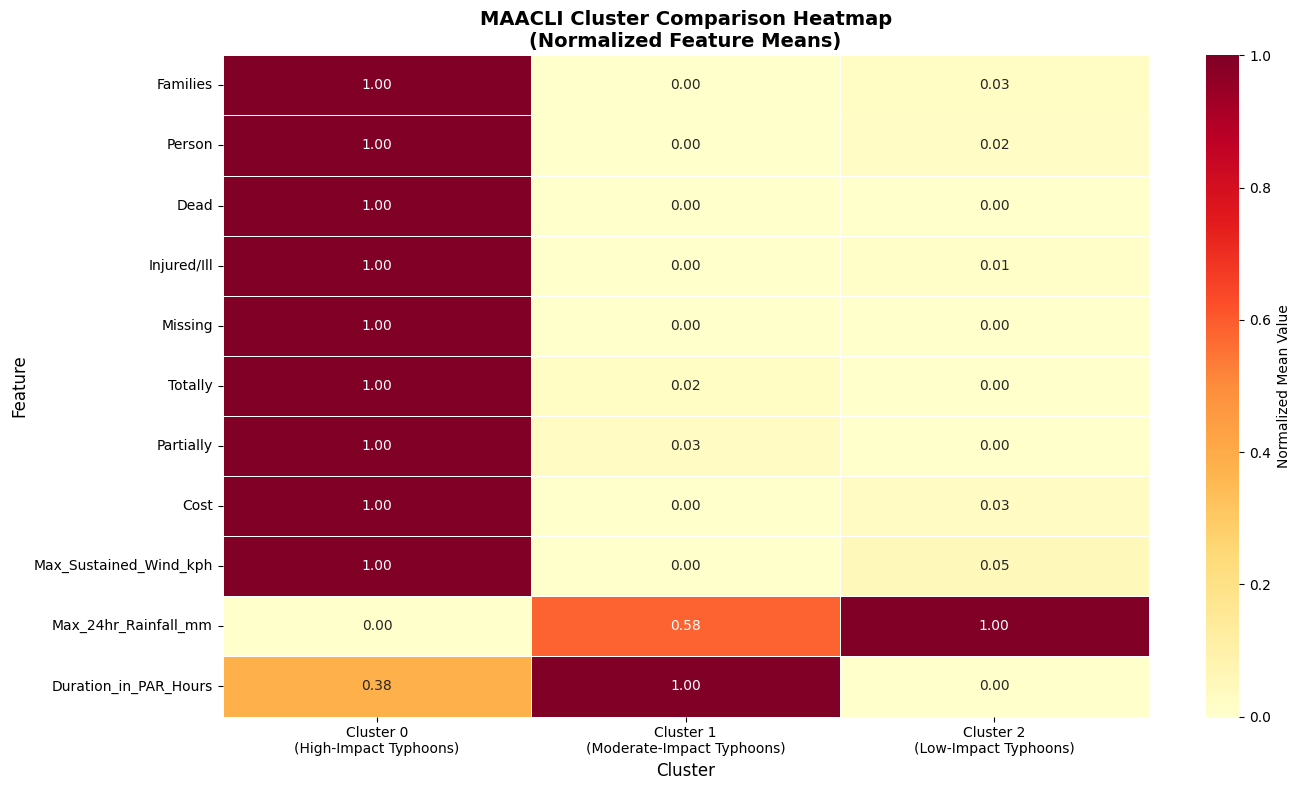

In [33]:
# Create cluster comparison heatmap for key features
key_features = ['Families', 'Person', 'Dead', 'Injured/Ill', 'Missing', 
                'Totally', 'Partially', 'Cost', 'Max_Sustained_Wind_kph',
                'Max_24hr_Rainfall_mm', 'Duration_in_PAR_Hours']

# Filter to available features
available_features = [f for f in key_features if f in df_original.columns]

# Calculate mean values for each cluster
cluster_means = df_original.groupby('cluster')[available_features].mean()

# Normalize for better visualization
cluster_means_normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Create heatmap
fig, ax = plt.subplots(figsize=(14, 8))

# Rename index for clarity
cluster_means_normalized.index = [f"Cluster {i}\n({cluster_names[i]})" for i in cluster_means_normalized.index]

sns.heatmap(cluster_means_normalized.T, annot=True, fmt='.2f', cmap='YlOrRd',
            linewidths=0.5, ax=ax, cbar_kws={'label': 'Normalized Mean Value'})

ax.set_title('MAACLI Cluster Comparison Heatmap\n(Normalized Feature Means)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)

plt.tight_layout()
plt.show()
plt.close(fig)

### 6. Typhoon Type Distribution by Cluster

TYPHOON TYPE DISTRIBUTION BY CLUSTER


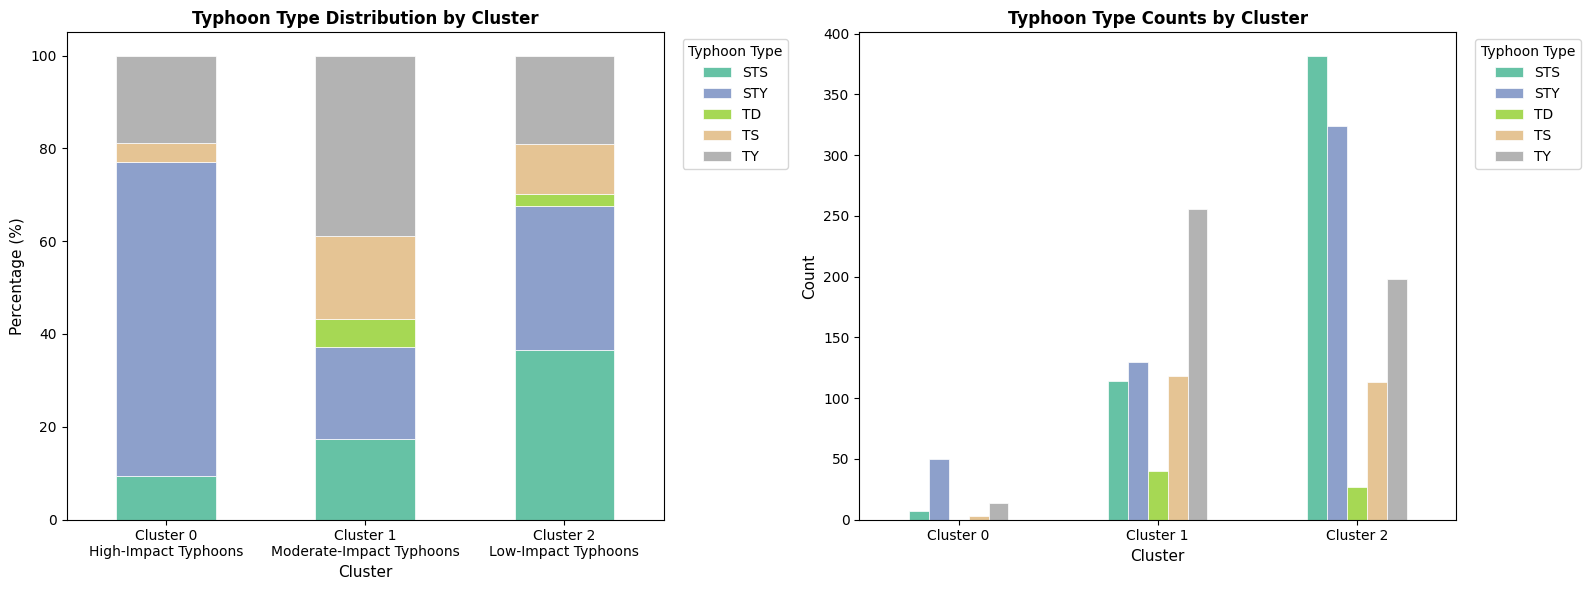


Typhoon Type Distribution (%):

Typhoon_Type    STS    STY    TD     TS     TY
cluster                                       
0              9.46  67.57  0.00   4.05  18.92
1             17.33  19.76  6.08  17.93  38.91
2             36.59  31.03  2.59  10.82  18.97


In [34]:
# Analyze typhoon type distribution by cluster
print("=" * 80)
print("TYPHOON TYPE DISTRIBUTION BY CLUSTER")
print("=" * 80)

typhoon_type_dist = pd.crosstab(df_original['cluster'], df_original['Typhoon_Type'], normalize='index') * 100

# Plot typhoon type distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
typhoon_type_dist.plot(kind='bar', stacked=True, ax=axes[0], 
                        colormap='Set2', edgecolor='white', linewidth=0.5)
axes[0].set_title('Typhoon Type Distribution by Cluster', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=11)
axes[0].set_ylabel('Percentage (%)', fontsize=11)
axes[0].legend(title='Typhoon Type', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[0].set_xticklabels([f'Cluster {i}\n{cluster_names[i]}' for i in typhoon_type_dist.index], rotation=0)

# Count distribution
typhoon_counts = pd.crosstab(df_original['cluster'], df_original['Typhoon_Type'])
typhoon_counts.plot(kind='bar', ax=axes[1], colormap='Set2', edgecolor='white', linewidth=0.5)
axes[1].set_title('Typhoon Type Counts by Cluster', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].legend(title='Typhoon Type', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[1].set_xticklabels([f'Cluster {i}' for i in typhoon_counts.index], rotation=0)

plt.tight_layout()
plt.show()
plt.close(fig)

# Print distribution table
print("\nTyphoon Type Distribution (%):\n")
print(typhoon_type_dist.round(2).to_string())

### 7. Regional Impact Analysis by Cluster

REGIONAL IMPACT ANALYSIS BY CLUSTER


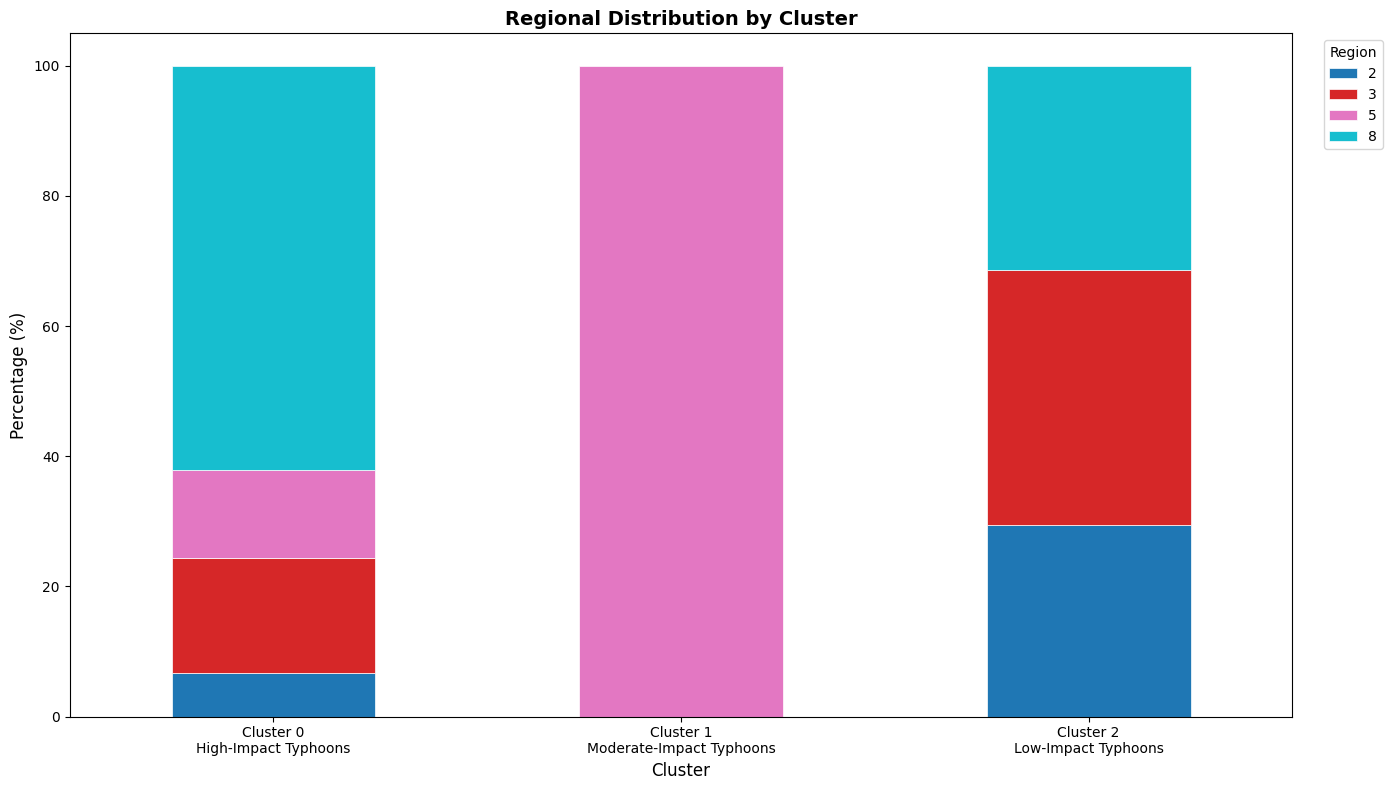


Regional Distribution (%):

Region       2      3       5      8
cluster                             
0         6.76  17.57   13.51  62.16
1         0.00   0.00  100.00   0.00
2        29.50  39.08    0.00  31.42


In [35]:
# Analyze regional distribution by cluster
print("=" * 80)
print("REGIONAL IMPACT ANALYSIS BY CLUSTER")
print("=" * 80)

regional_dist = pd.crosstab(df_original['cluster'], df_original['Region'], normalize='index') * 100

# Plot regional distribution
fig, ax = plt.subplots(figsize=(14, 8))

regional_dist.plot(kind='bar', stacked=True, ax=ax, colormap='tab10', 
                   edgecolor='white', linewidth=0.5)
ax.set_title('Regional Distribution by Cluster', fontsize=14, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xticklabels([f'Cluster {i}\n{cluster_names[i]}' for i in regional_dist.index], rotation=0)

plt.tight_layout()
plt.show()
plt.close(fig)

# Print regional summary
print("\nRegional Distribution (%):\n")
print(regional_dist.round(2).to_string())

### 8. MAACLI Summary Report

In [36]:
# Generate MAACLI Summary Report
print("=" * 80)
print("MAACLI FRAMEWORK - FINAL SUMMARY REPORT")
print("=" * 80)

print("\n" + "="*80)
print("CLUSTERING METHODOLOGY")
print("="*80)
print(f"Algorithm: KMeans with Optuna Optimization")
print(f"Number of Clusters: {maacli.n_clusters}")
print(f"Best Parameters: {best_params}")
print(f"\nClustering Metrics:")
print(f"  - Silhouette Score: {silhouette:.4f}")
print(f"  - Calinski-Harabasz Index: {calinski:.4f}")
print(f"  - Davies-Bouldin Index: {davies:.4f}")

print("\n" + "="*80)
print("CLUSTER INTERPRETATIONS")
print("="*80)

for cluster_id in range(maacli.n_clusters):
    severity = severity_classifications[cluster_id]
    cluster_data = df_original[df_original['cluster'] == cluster_id]
    
    print(f"\n--- Cluster {cluster_id}: {severity['label']} Typhoons ---")
    print(f"Sample Size: {len(cluster_data)} ({len(cluster_data)/len(df_original)*100:.1f}%)")
    print(f"Severity Rank: {severity['rank']} of {maacli.n_clusters}")
    
    # Key statistics
    print(f"\nKey Statistics:")
    print(f"  - Avg. Affected Families: {cluster_data['Families'].mean():.0f}")
    print(f"  - Avg. Affected Persons: {cluster_data['Person'].mean():.0f}")
    print(f"  - Avg. Deaths: {cluster_data['Dead'].mean():.2f}")
    print(f"  - Avg. Missing: {cluster_data['Missing'].mean():.2f}")
    print(f"  - Avg. Houses Totally Damaged: {cluster_data['Totally'].mean():.2f}")
    print(f"  - Avg. Cost: ₱{cluster_data['Cost'].mean():,.2f}")
    print(f"  - Avg. Max Wind Speed: {cluster_data['Max_Sustained_Wind_kph'].mean():.0f} kph")
    
    # Most common typhoon type
    common_type = cluster_data['Typhoon_Type'].mode().values[0] if len(cluster_data) > 0 else 'N/A'
    print(f"  - Most Common Typhoon Type: {common_type}")

print("\n" + "="*80)
print("TOP DIFFERENTIATING FEATURES")
print("="*80)
print("\nFeatures that most distinguish clusters:")
for idx, row in maacli.feature_importance.head(5).iterrows():
    print(f"  {idx+1}. {row['feature']}: {row['importance']:.4f}")

print("\n" + "="*80)
print("DECISION RULES FOR CLUSTER ASSIGNMENT")
print("="*80)
print(tree_rules)

print("\n" + "="*80)
print("END OF MAACLI REPORT")
print("="*80)

MAACLI FRAMEWORK - FINAL SUMMARY REPORT

CLUSTERING METHODOLOGY
Algorithm: KMeans with Optuna Optimization
Number of Clusters: 3
Best Parameters: {'init': 'k-means++', 'n_init': 29, 'max_iter': 237, 'tol': 0.0007910515493964145, 'algorithm': 'elkan'}

Clustering Metrics:
  - Silhouette Score: 0.1479
  - Calinski-Harabasz Index: 225.3349
  - Davies-Bouldin Index: 2.0925

CLUSTER INTERPRETATIONS

--- Cluster 0: High-Impact Typhoons ---
Sample Size: 74 (4.2%)
Severity Rank: 1 of 3

Key Statistics:
  - Avg. Affected Families: 12192
  - Avg. Affected Persons: 47402
  - Avg. Deaths: 2.39
  - Avg. Missing: 0.07
  - Avg. Houses Totally Damaged: 1062.15
  - Avg. Cost: ₱4,673,571.27
  - Avg. Max Wind Speed: 178 kph
  - Most Common Typhoon Type: STY

--- Cluster 1: Moderate-Impact Typhoons ---
Sample Size: 658 (37.0%)
Severity Rank: 2 of 3

Key Statistics:
  - Avg. Affected Families: 668
  - Avg. Affected Persons: 2617
  - Avg. Deaths: 0.02
  - Avg. Missing: 0.00
  - Avg. Houses Totally Damaged: 

In [37]:
# Export MAACLI results to file
maacli_report_path = '../cluster_explanations_MAACLI_KMeans.txt'

with open(maacli_report_path, 'w') as f:
    f.write("=" * 80 + "\n")
    f.write("MAACLI FRAMEWORK - KMEANS CLUSTERING INSIGHTS\n")
    f.write("=" * 80 + "\n\n")
    
    f.write("1. DECISION TREE RULES:\n")
    f.write(tree_rules + "\n\n")
    
    f.write("2. CLUSTER DESCRIPTIONS:\n")
    for cluster_id in range(maacli.n_clusters):
        severity = severity_classifications[cluster_id]
        cluster_data = df_original[df_original['cluster'] == cluster_id]
        desc = cluster_descriptions[cluster_id]
        
        f.write(f"\n**Cluster {cluster_id} – {severity['label']} Typhoons**\n")
        f.write(f"- Sample Count: {len(cluster_data)} ({len(cluster_data)/len(df_original)*100:.1f}%)\n")
        f.write(f"- Severity Score: {severity['severity_score']:.2f}\n")
        
        for feature, stats in desc['characteristics'].items():
            f.write(f"- {feature}: 75% between {stats['q25']:.0f} and {stats['q75']:.0f}\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("3. CLUSTERING METRICS:\n")
    f.write(f"- Silhouette Score: {silhouette:.4f}\n")
    f.write(f"- Calinski-Harabasz Index: {calinski:.4f}\n")
    f.write(f"- Davies-Bouldin Index: {davies:.4f}\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("4. FEATURE IMPORTANCE:\n")
    for idx, row in maacli.feature_importance.head(10).iterrows():
        f.write(f"- {row['feature']}: {row['importance']:.4f}\n")

print(f"MAACLI report exported to: {maacli_report_path}")

MAACLI report exported to: ../cluster_explanations_MAACLI_KMeans.txt
